In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mftool import Mftool

In [4]:
mf = Mftool()
result = mf.get_available_schemes('hdfc')
for scheme_code, scheme in result.items():
    print(scheme_code, scheme)

128628 HDFC Banking and PSU Debt Fund - Growth Option
128629 HDFC Banking and PSU Debt Fund - Growth Option - Direct Plan
128627 HDFC Banking and PSU Debt Fund - IDCW Option
128626 HDFC Banking and PSU Debt Fund - IDCW Option - Direct Plan
113070 HDFC Corporate Bond Fund - Growth Option
118987 HDFC Corporate Bond Fund - Growth Option - Direct Plan
132848 HDFC Corporate Bond Fund - IDCW Option
132849 HDFC Corporate Bond Fund - IDCW Option - Direct Plan
113071 HDFC Corporate Bond Fund - Quarterly IDCW Option
118986 HDFC Corporate Bond Fund - Quarterly IDCW Option - Direct Plan
128053 HDFC Credit Risk Debt Fund - Growth Option
128051 HDFC Credit Risk Debt Fund - Growth Option - Direct Plan
133148 HDFC Credit Risk Debt Fund - IDCW Option
133147 HDFC Credit Risk Debt Fund - IDCW Option - Direct Plan
128050 HDFC Credit Risk Debt Fund - Quarterly IDCW - Direct Plan
128052 HDFC Credit Risk Debt Fund - Quarterly IDCW Option
101872 HDFC Dynamic Debt Fund - Growth Option
119075 HDFC Dynamic Debt 

In [5]:
# mf = Mftool()
mutual_fund_code = '118989'
d1 = mf.get_scheme_quote(mutual_fund_code)
d2 = mf.get_scheme_details(mutual_fund_code)
{**d1, **d2}

{'scheme_code': 118989,
 'scheme_name': 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan',
 'last_updated': '30-Apr-2025',
 'nav': '195.45',
 'fund_house': 'HDFC Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Mid Cap Fund',
 'scheme_start_date': {'date': '01-01-2013', 'nav': '18.79900'}}

,date,nav,dayChange
0,2013-01-01,18.799,NaN
1,2013-01-02,18.955,0.156
2,2013-01-03,18.973,0.018
3,2013-01-04,18.990,0.017
4,2013-01-07,19.039,0.049
...,...,...,...
3028,2025-04-24,197.241,0.119
3029,2025-04-25,194.244,-2.997
3030,2025-04-28,195.999,1.755
3031,2025-04-29,196.381,0.382


Text(0.5, 1.0, 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan')

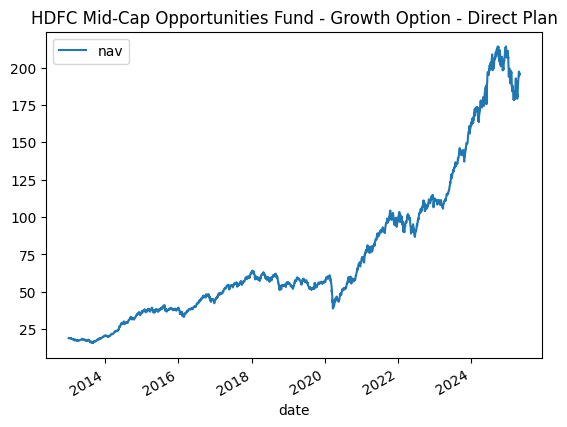

In [6]:
mutual_fund_code = '118989'
mutual_fund = 'HDFC Mid-Cap Opportunities Fund - Growth Option - Direct Plan'

df = mf.get_scheme_historical_nav(mutual_fund_code,as_Dataframe=True).reset_index()
df['nav'] = df['nav'].astype(float)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date').reset_index(drop=True)
display(df)
df.plot(x='date', y='nav')
plt.title(mutual_fund)

In [7]:
per_inc = df['dayChange']
print(per_inc.isna().sum())
per_inc.dropna()

# df.iloc[2300]
# df
per_inc.size

1


3033

In [8]:
100000 / 77.7

1287 * (92 - 77)

19305

In [9]:
Total_days = 2300
curr_day = 2000
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if neg_momentum >= 3:
      invested = True
      neg_momentum = 0


  else:
    neg_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if pos_momentum >= 4 and per_inc[curr_day] < -0.5: # &&
      invested = False
      pos_momentum = 0

  curr_day += 1

price

np.float64(123866.7908325326)

In [11]:
Total_days = 900
curr_day = 600
pos_momentum = 0
neg_momentum = 0
price = 100000
invested = False

while curr_day < Total_days:

  if per_inc[curr_day] > 0:
    pos_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if neg_momentum >= 3:
      invested = True
      ++curr_day
      neg_momentum = 0


  else:
    neg_momentum += 1
    if invested:
      price = price * (1 + per_inc[curr_day]/100)

    if pos_momentum >= 3 and (per_inc[curr_day] >= -0.2 or neg_momentum >= 2): # &&
      invested = False
      pos_momentum = 0

  curr_day += 1

price

np.float64(109373.90067608612)